In [1]:
import sys
import os
workPath = os.path.abspath('..')
if not workPath in sys.path:
    sys.path.append(workPath)

In [2]:
import planetengine
from planetengine.features.noise import basic
from planetengine.initials import sinusoidal
quickShow = planetengine.quickShow

In [3]:
dither = basic.build(dims = 2, pert = 0.5, freq = 1e1)
system1 = planetengine.systems.isovisc.build(
    res = 32,
    Ra = 1e5,
    aspect = 'max',
    f = 1. / 3.,
    _initial_temperatureField = sinusoidal.build(freq = 1.)
    )
# system2 = planetengine.systems.isovisc.build(res = 64, Ra = 1e5, dither = dither)

In [4]:
# from timeit import timeit

In [5]:
# timeit(system1.iterate, number = 10)

In [6]:
# timeit(system2.iterate, number = 10)

In [7]:
# quickShow(system.locals.temperatureField)
# for i in range(10):
#     system.go(10)
#     quickShow(system.locals.temperatureField)

Variable{-9223363303355489641}



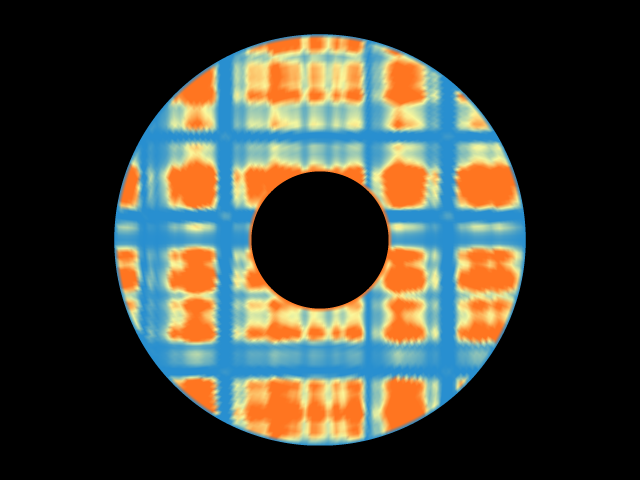

Variable{-9223363303355489641}



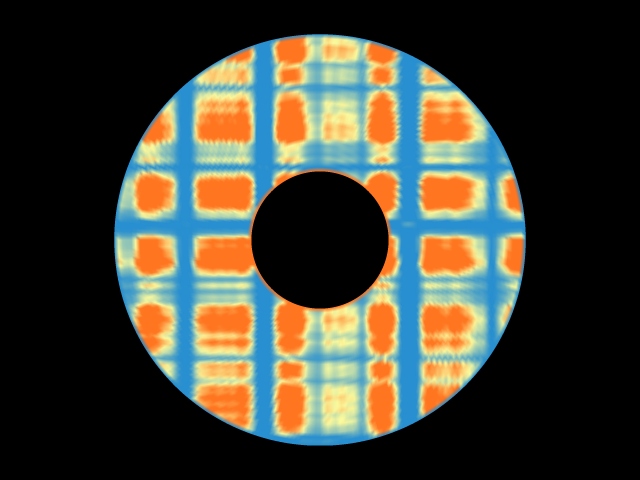

Variable{-9223363303355489641}



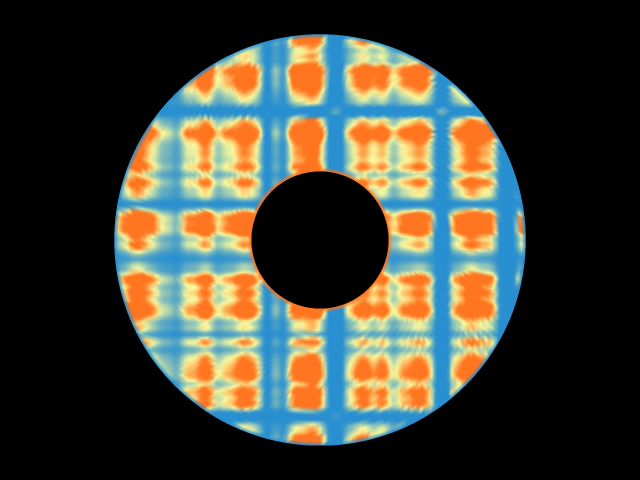

In [8]:
dither._system = system1
system1.locals.temperatureField.data[:] = 0.5
for i in range(3):
    system1.count.value += 1
    with dither:
        quickShow(system1.locals.temperatureField, facecolour = 'black')